In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "cyclistic-data-may-2021-may-2022"

### This is an exercise notebook for my first ever Data Analysis Case Study

Kindly be aware that this case study is part of Google Data Analytic Capstone Project. For this particular notebook, I would like to show all of my thought process as someone who is new to data analysis. You can look at the notebook as a diary log as I'd write down any question that comes to mind. This notebook may not have elaborated explanation for beginners to learn from, but I hope for more seasoned data analyst who view this notebook to leave any comment for any shortfall or may suggest any improvement that can be done for my future learning. Thanks!

**Side note: This will as well be the experimental notebook for myself to play around with Kaggle for the first time and explore the case study.** With full honesty, since this is my first time performing data analysis, I refer to a lot other published codes and google in order to help myself along the way. In no way am I trying to plagirize anyone's work, if there is a way for me to credit them please do let me know so I can do so.

<head><center><h2>CASE STUDY SCENARIO</h2><center>
    <center><h4>You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
        visualizations.</h4><center></head>
        <br>

## STEP 1: ASK

Insight: I am working as a Junior Data Analyst and requires to assist the team to construct a new marketing strategy. The burning question would be **How casual riders and annual members use Cyclistic bikes differently?** The analysis from the data should help the team to target their marketing on the casual riders to subscribe for a membership in order to help the company to gain more profit.
        
Now that we have the BIG QUESTION laid out, let's take a look at the data we have and what can we do with the data. In order to do that, we will use R as a tool for the analysis.

## STEP 2: PREPARE

For this step, I will load the CSV files that we received and look into the data structure. We will analyze, clean up and combine the data into a single data source for easier workability.

In [2]:
#First of all, let's import the neccessary libraries into R for the analysis

library("tidyverse")
library("ggplot2")
library("lubridate")
library("dplyr")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
#Now we will import the data and assign as variables respectively

tripdata_2021_05 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202105-divvy-tripdata.csv")
tripdata_2021_06 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202106-divvy-tripdata.csv")
tripdata_2021_07 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202107-divvy-tripdata.csv")
tripdata_2021_08 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202108-divvy-tripdata.csv")
tripdata_2021_09 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202109-divvy-tripdata.csv")
tripdata_2021_10 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202110-divvy-tripdata.csv")
tripdata_2021_11 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202111-divvy-tripdata.csv")
tripdata_2021_12 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202112-divvy-tripdata.csv")
tripdata_2022_01 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202201-divvy-tripdata.csv")
tripdata_2022_02 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202202-divvy-tripdata.csv")
tripdata_2022_03 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202203-divvy-tripdata.csv")
tripdata_2022_04 <- read.csv("../input/cyclistic-data-may-2021-may-2022/202204-divvy-tripdata.csv")

Before we go further to combining the data set into a single source, I wanted to make sure that all files have the same data structure (column names, column arrangement and so on). My method of doing so is by opening up each CSV files using excel and check the column title one by one. If there are any other ways to do so (using R) please share it with me! Below is the outcome for this process.

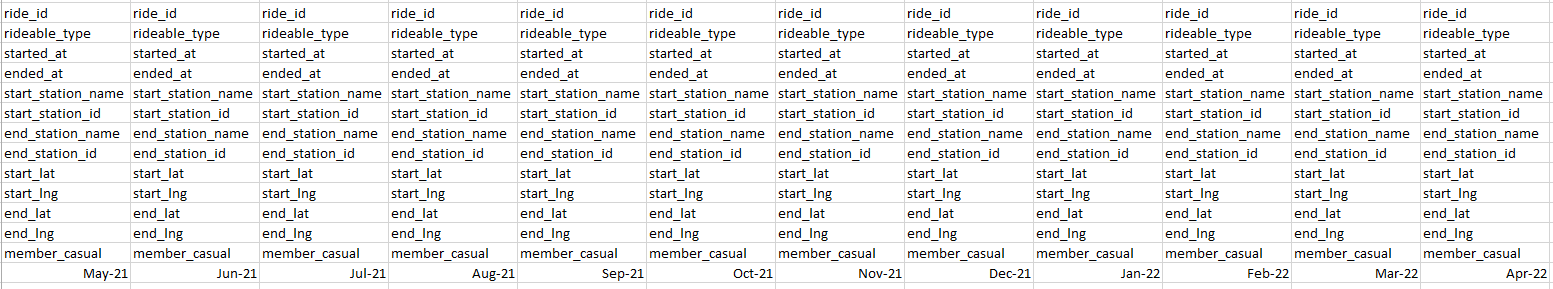

From the above, we can see that each data set have the same column title and are ready to be combined straight away.

In [4]:
#Now let's combine all the data set into a single data set

all_tripdata <- bind_rows(tripdata_2021_05, tripdata_2021_06, tripdata_2021_07, tripdata_2021_08, tripdata_2021_09, tripdata_2021_10, tripdata_2021_11, tripdata_2021_12, tripdata_2022_01, tripdata_2022_02, tripdata_2022_03, tripdata_2022_04)

#Running the above code should combine all data sets into a single data sets under the variable all_tripdata

In [5]:
#Let's have a look if all the columns in the dataframe are the same as in the individual CSV

head(all_tripdata, 5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,,,,,41.90,-87.63,41.89,-87.61,casual
2,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,,,,,41.88,-87.62,41.79,-87.58,casual
3,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,,,,,41.92,-87.70,41.92,-87.70,casual
4,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,,,,,41.92,-87.70,41.94,-87.69,casual
5,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,,,,,41.94,-87.69,41.94,-87.70,casual


In [6]:
#Now let's check if all the CSVs have been combined into the dataframe

nrow(all_tripdata)

[1] 5757551

From the code above we can see that all columns that has been listed above are still intact and our data frame now have 5,757,551. That is a lot of rows. We can verify this by simply checking on each of CSV files and add up.

Now that we have all in one place, let's do some preliminary analysis and data cleaning. From the available datas(refer to each columns), what are the data that we can use and how? 
1. We have different ride type for members vs non-members
2. We can know how long riders use Cyclistic for a given ride
3. We know on what days of the week do the riders use Cyclistic
4. We can know the distant that each rider use which might be able to bring insightful discovery.

But looking into the latitude and longitude data might be too tricky for my level, so I'm going to go with the first 3 questions.

**NOW ONTO THE CLEANING PROCESS**

## STEP 3 : PROCESS

What I'm going to do in this step is to process the data by performing some cleaning. Since I am at the level that I am now, I will delete the unnecessary columns to avoid errors/mistake. The columns that I am going to delete will be
* start_station_name
* start_station_id
* end_station_name
* end_station_id
* start_lat
* start_lng
* end_lat
* end_lng

This can be heartbreaking to some of you! But I want to focus on only the data that I am capable to look into for now. I'm sorry...

*Oh those precious data...*

In [7]:
#I'm going to use the subset() function to delete the columns and assign a new name for my dataframe

all_tripdata_clean = subset(all_tripdata, select = -c(start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng))

head(all_tripdata_clean)

,ride_id,rideable_type,started_at,ended_at,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>
1,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,casual
2,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,casual
3,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,casual
4,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,casual
5,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,casual
6,F5E63DFD96B2A737,electric_bike,2021-05-30 11:33:41,2021-05-30 11:57:17,casual


In [8]:
# Next, I'm going to separate the date and time into different columns. 
# I need to do this so that I am able to identify on which day the rider uses Cyclistic to bring some new insight.

all_tripdata_clean$date_started <- as.Date(all_tripdata_clean$started_at)
all_tripdata_clean$time_started <- format(as.POSIXct(all_tripdata_clean$started_at), format = "%H:%M:%S")
all_tripdata_clean$day_started <- format(as.Date(all_tripdata_clean$date_started), "%A")


all_tripdata_clean$date_ended <- as.Date(all_tripdata_clean$ended_at)
all_tripdata_clean$time_ended <- format(as.POSIXct(all_tripdata_clean$ended_at), format = "%H:%M:%S")
all_tripdata_clean$day_ended <- format(as.Date(all_tripdata_clean$date_ended), "%A")

In [9]:
#Now that we have separate and added new columns, I am going to remove the unused columns to make the dataframe cleaner

all_tripdata_clean = subset(all_tripdata_clean, select = -c(started_at, ended_at))

head(all_tripdata_clean, 10)

,ride_id,rideable_type,member_casual,date_started,time_started,day_started,date_ended,time_ended,day_ended
,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<date>,<chr>,<chr>
1,C809ED75D6160B2A,electric_bike,casual,2021-05-30,11:58:15,Sunday,2021-05-30,12:10:39,Sunday
2,DD59FDCE0ACACAF3,electric_bike,casual,2021-05-30,11:29:14,Sunday,2021-05-30,12:14:09,Sunday
3,0AB83CB88C43EFC2,electric_bike,casual,2021-05-30,14:24:01,Sunday,2021-05-30,14:25:13,Sunday
4,7881AC6D39110C60,electric_bike,casual,2021-05-30,14:25:51,Sunday,2021-05-30,14:41:04,Sunday
5,853FA701B4582BAF,electric_bike,casual,2021-05-30,18:15:39,Sunday,2021-05-30,18:22:32,Sunday
6,F5E63DFD96B2A737,electric_bike,casual,2021-05-30,11:33:41,Sunday,2021-05-30,11:57:17,Sunday
7,C884951E36656727,electric_bike,casual,2021-05-30,10:51:37,Sunday,2021-05-30,11:06:20,Sunday
8,48B60B250FE75AF9,electric_bike,casual,2021-05-05,13:57:03,Wednesday,2021-05-05,14:14:58,Wednesday
9,E3D0CC2FE1359880,electric_bike,casual,2021-05-05,11:31:26,Wednesday,2021-05-05,11:34:03,Wednesday


Coolios! We have now cleaned the dataframe and are ready to go the next step! Let's begin with the analysis.

## STEP 4 : ANALYSIS

In this step, I am going to start analyzing the datas to see **what are the difference between casual riders and members.** But before that I am going to list down few question that comes to mind when I look at the cleaned dataframe.

### STEP 1.1 : ASK *(again..)*
* Does casual rider prefers electric bike or classic bike in comparison to members?
* Does casual rider uses cyclistic more on the weekends or weekdays?
* If more on the weekdays, do they use it for work? 
* If more on the weekends, could it be a part time job? Leisure? Or a hobby?
* How many are there for casual riders who have similar behaviors as members but have not yet subscribe to a membership?

In [10]:
#For the first analysis, we will have a look at the behavior of members and casual on the selection of ride type

tripdata_summary_type <- all_tripdata_clean %>%
  count(rideable_type, member_casual, sort = TRUE)


View(tripdata_summary_type)

rideable_type,member_casual,n
<chr>,<chr>,<int>
classic_bike,member,1968374
electric_bike,member,1252819
classic_bike,casual,1234410
electric_bike,casual,1010557
docked_bike,casual,291391


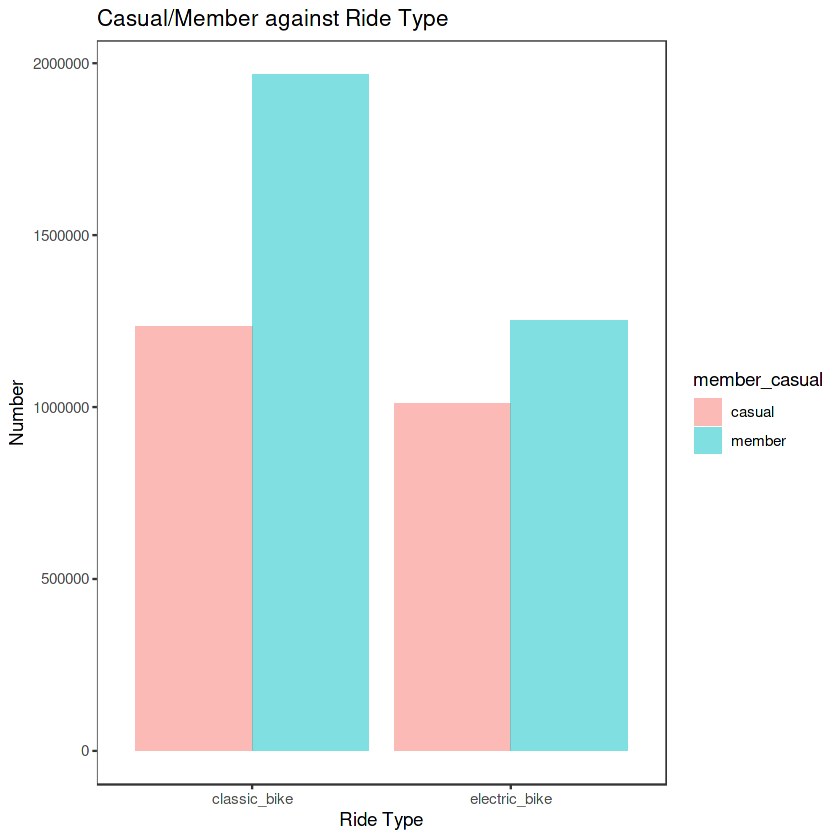

In [11]:
# From the table above we can see that docked type bike are the least favorable and the numbers are small enough to be negligable in this analysis
# The following code will filter out docked_type and create a bar chart to make it easier to undestand the comparison

all_tripdata_clean %>%

filter (rideable_type == "classic_bike" | rideable_type == "electric_bike") %>%
  
  ggplot(aes(rideable_type, fill = member_casual)) + geom_bar(position = "dodge", alpha = 0.5) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  labs(title = "Casual/Member against Ride Type", x = "Ride Type", y = "Number")

In [12]:
#I am going to create a new dataframe to summarize the number of users between casual and members according to days of the week.
#We will then use the new dataframe to create our vissualization


tripdata_summary_day <- all_tripdata_clean %>%
  count(day_started, member_casual, sort = TRUE)


View(tripdata_summary_day)

day_started,member_casual,n
<chr>,<chr>,<int>
Saturday,casual,558617
Wednesday,member,506969
Tuesday,member,498682
Thursday,member,485843
Sunday,casual,477032
Friday,member,453281
Monday,member,445635
Saturday,member,442741
Sunday,member,388042


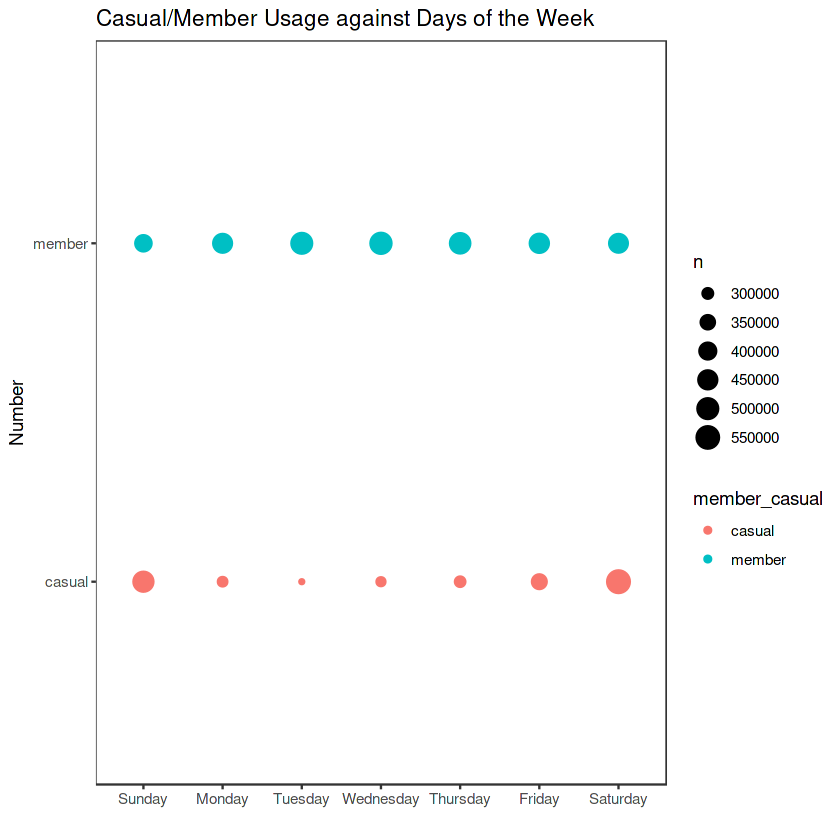

In [13]:
tripdata_summary_day %>%

ggplot (aes(factor(day_started, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")), member_casual))+
geom_point(aes(size = n,
               color = member_casual))+
theme_bw() +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  labs(title = "Casual/Member Usage against Days of the Week", x = "", y = "Number")

### Analysis:

* From the first graph we can see that casual users and members share the same interest in rideable type which is the Classic Bike
* From the same graph we can also see that more users prefers the Classic bike in comparison to the Electric Bike
* From the second graph, casual users are more inclined to use Cyclistic during the weekends instead of weekdays
* For members, we can see that the usage are more stagnant throughout the week. 
* This may indicate that most of casual users only use Cylistic for leisure, while members uses Cyclistic as their mode for transportation

## STEP 5 : SHARE

Finally, we can share this new insight to the marketing team for them come out with a new marketing strategy. The new marketing strategy should include:
1. Push the market for Classic Ride for casual users to gain more traction for membership registration
2. Introduce new perks or packages for weekend users in order to convert more casual user into membership
3. Focus on the number of casual users on the weekend, they uses Cyclistic for leisure. Provide competitions or such for members which will attract more casual user to get membership.


## THANK YOU

I know this case study can be too simple with only two visualisation provided but this is the best I can do within one week timeframe (Limited to only an hour or two a day, with zero R knowledge on day 1). I've seen so many other analysis which are more extensive than mine that really makes me eager to learn more! I might use this very same case study again or find a new dataset to create more analysis and data visualisation.

**Thank you so much if you read through this notebook.**